## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Shareability potential

In [1]:
import os
import pandas as pd
%load_ext autoreload
%autoreload 2
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __make the config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 

In [5]:
params.gammdist.shape = 2
params.gammdist.scale = 500
params.gamma_imp.shape = 1.15
params.gamma_imp.scale = 3200
params.nP = 100
params.nCenters = 3
params.city = 'Amsterdam, Netherlands'
params.t0 = '17:00'
params = ExMAS.utils.make_paths(params)
ExMAS.utils.save_config(params, path = 'ExMAS/data/configs/potential.json')

In [6]:
params.t0 = pd.to_datetime(params.t0)

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [7]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [13]:
inData = ExMAS.utils.synthetic_demand_poly_II(inData, params)

In [11]:
inData = ExMAS.utils.generate_demand(inData, params)

4. __save requests__ 

In [16]:
inData.requests.to_csv('poly_demand.csv')

5. __load requests__ 

In [17]:
inData.requests = pd.read_csv('poly_demand.csv', index_col = 0)
inData.requests.treq = pd.to_datetime(inData.requests.treq)
inData.requests['pax_id'] = inData.requests.index.copy()
inData.requests.tarr = pd.to_datetime(inData.requests.tarr)
inData.requests.ttrav = pd.to_timedelta(inData.requests.ttrav)

5. __visualize demand__ 

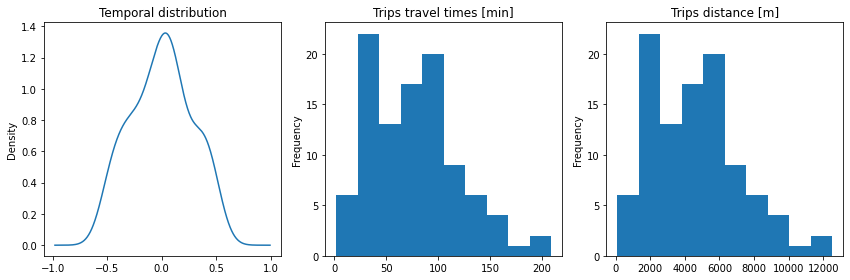

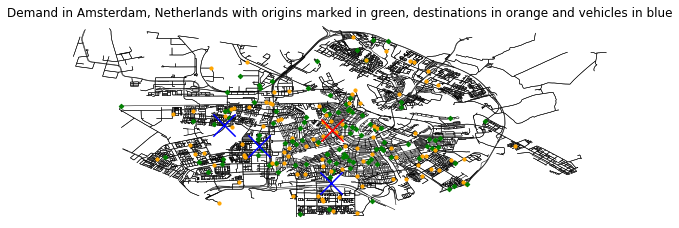

In [18]:
ExMAS.utils.plot_demand_poly(inData, params)

### run

03-09-20 15:50:23-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
03-09-20 15:50:23-INFO-creating combinations
03-09-20 15:50:23-INFO-9900	 nR*(nR-1)
03-09-20 15:50:23-INFO-4123	departure compatibility
03-09-20 15:50:24-INFO-1856	origins shareability
03-09-20 15:50:24-INFO-370	utility for i
03-09-20 15:50:24-INFO-64	utility for j
03-09-20 15:50:24-CRITICAL-FIFO pairs assertion failed
03-09-20 15:50:24-WARNING-       origin_i  destination_i  ttrav_i  treq_i     delta_i  dist_i   VoT_i  \
i  j                                                                          
54 60  46421260     6653328627      714    1845  400.153846    5712  0.0035   
55 49  46565946       46534919      548    1940  307.417582    4387  0.0035   

       origin_j  destination_j  ttrav_j  ...  indexes_orig  indexes_dest  \
i  j                                     ...                               
54 60  46334380     1578160190      747  ...      [54, 60]      [54, 60]   
55 49  46551596   

AssertionError: 

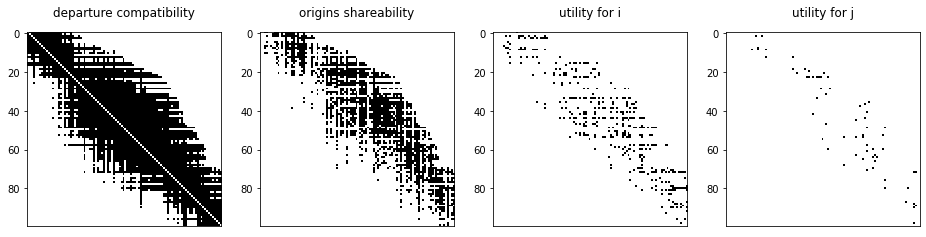

In [19]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [ ]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

 all feasible rides

---
(c) Rafał Kucharski, Delft, 2020